In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\mesne\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US=df_DA_US.explode('job_skills')


In [9]:
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [28]:
df_DA_top_pay=df_DA_US_group.sort_values("median",ascending=False).head(10)

In [29]:
df_DA_skills=df_DA_US_group.sort_values('count',ascending=False).head(10).sort_values('median',ascending=False)

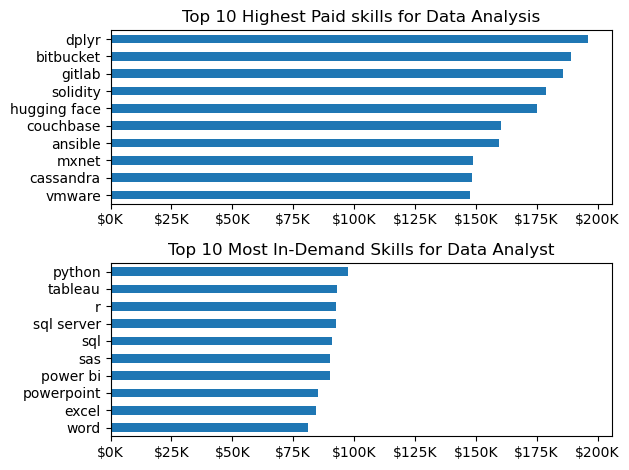

In [ ]:
fig,ax=plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid skills for Data Analysis')
ax[0].invert_yaxis()
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].invert_yaxis()
ax[1].set_ylabel("")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

fig.tight_layout()

plt.show()